In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [10]:
df = pd.read_csv('combined_data_with_extra_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Sex'] = df['Sex'].str.lower()
df

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Ruminococcaceae,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia
0,ERR1075960,male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,ERR1854747,male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,ERR688529,male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,ERR1316059,male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,SRR5649200,male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,SRR18576130,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.206897,0.0
1591,SRR18576131,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1592,SRR18576132,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0
1593,SRR18576133,male,0.0,0,0.00,Schizophrenia,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0


In [11]:
park_df = df[(df['Condition'] == 'Parkinsons') | (df['Condition'] == 'Health')]

In [12]:
park_df.columns

Index(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Condition', 'Alistipes',
       'Bacteroides', 'Bifidobacterium', 'Blautia', 'Clostridium', 'Dorea',
       'Eubacterium', 'Faecalibacterium', 'Oscillibacter', 'Parabacteroides',
       'Roseburia', 'Ruminococcus', 'Unknown', 'Coprococcus', 'Lachnospira',
       'Oscillospira', 'Subdoligranulum', 'Sutterella', 'Anaerostipes',
       'Streptococcus', 'Akkermansia', 'Anaerofilum', 'Anaerotruncus',
       'Bacillus', 'Barnesiella', 'Desulfovibrio', 'Dialister',
       'Erysipelatoclostridium', 'Holdemania', 'Intestinibacter',
       'Lachnoclostridium', 'Lactobacillus', 'Odoribacter', 'Prevotella',
       'Pseudomonas', 'Sporobacter', 'Ruminiclostridium', 'Corynebacterium',
       'Eggerthella', 'Acinetobacter', 'Parasutterella', 'Veillonella',
       'Uncultured Organism', 'Ruminococcaceae', 'Phocaeicola',
       'Paraprevotella', 'Tidjanibacter', 'Flavonifractor',
       'Mediterraneibacter', 'Agathobacter', 'Ligilactobacillus',
       '

In [13]:
park_df = park_df.drop(['Run ID', 'Country', 'BMI', 'Unknown', 'Uncultured Organism'], axis=1)

In [14]:
park_df

,Sex,Age,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Ruminococcaceae,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia
0,male,0.0,Health,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,male,62.0,Health,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,male,63.0,Health,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,male,67.0,Health,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,male,27.0,Health,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,female,58.0,Health,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1507,female,32.0,Health,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1508,male,46.0,Health,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.065217,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1510,female,61.0,Health,0.081633,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.061224,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
park_df = pd.get_dummies(park_df, columns=['Sex'], dtype='int')

In [16]:
park_df

,Age,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,...,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Sex_female,Sex_male
0,0.0,Health,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,62.0,Health,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,63.0,Health,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,67.0,Health,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,27.0,Health,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,58.0,Health,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1507,32.0,Health,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1508,46.0,Health,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1510,61.0,Health,0.081633,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.061224,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [17]:
dictionary = {'Health': 0, 
              'Parkinsons': 1
}

park_df.loc[:, 'Condition'] = park_df['Condition'].replace(dictionary)

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_75222/3273852852.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  park_df.loc[:, 'Condition'] = park_df['Condition'].replace(dictionary)


In [21]:
park_df_label = park_df['Condition']
park_df = park_df.drop(['Condition'], axis=1)

In [22]:
park_df

,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Sex_female,Sex_male
0,0.0,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,62.0,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,63.0,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,67.0,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,27.0,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,58.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1507,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1508,46.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108696,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1510,61.0,0.081633,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.061224,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [23]:
park_df = park_df.loc[:, (park_df != 0).any()]

In [24]:
park_df

,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Prevotella,Ruminococcaceae,Phocaeicola,Tidjanibacter,Sex_female,Sex_male
0,0.0,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0,1
1,62.0,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0,1
2,63.0,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0,1
3,67.0,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0,1
4,27.0,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,58.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1,0
1507,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1,0
1508,46.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108696,...,0.0,0.0,0.0,0.0,0.0,0.065217,0.0,0.000000,0,1
1510,61.0,0.081633,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.061224,1,0


In [25]:
park_df.dtypes

Age                 float64
Alistipes           float64
Bacteroides         float64
Bifidobacterium     float64
Blautia             float64
Clostridium         float64
Dorea               float64
Eubacterium         float64
Faecalibacterium    float64
Oscillibacter       float64
Parabacteroides     float64
Roseburia           float64
Ruminococcus        float64
Coprococcus         float64
Lachnospira         float64
Oscillospira        float64
Subdoligranulum     float64
Sutterella          float64
Anaerostipes        float64
Prevotella          float64
Ruminococcaceae     float64
Phocaeicola         float64
Tidjanibacter       float64
Sex_female            int64
Sex_male              int64
dtype: object

In [26]:
park_df_columns = park_df.columns
len(park_df)

256

In [27]:
scalar = StandardScaler()
park_df = scalar.fit_transform(park_df)
# actually drop country and one-hot encode gender

## 3-component

In [28]:
park_pca3 = PCA(n_components=3)
park_result3 = park_pca3.fit_transform(park_df)
print("The explained variances for the parkinsons dataframe are:", 
      park_pca3.explained_variance_ratio_)



The explained variances for the parkinsons dataframe are: [0.15852208 0.1002905  0.09367044]


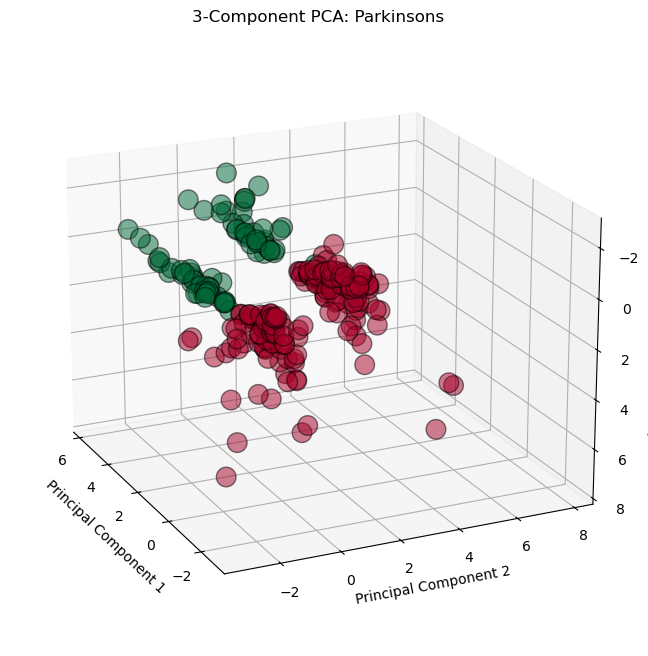

In [50]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', elev=200, azim=25)

x = park_result3[:, 0]
y = park_result3[:, 1]
z = park_result3[:, 2]


ax.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200, c=park_df_label, alpha=0.5)
plt.title('3-Component PCA: Parkinsons')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.savefig('pca3_park.jpg')

plt.show()

In [30]:
park_shape3 = park_pca3.components_.shape[0]
park_feature_names3 = park_df_columns

In [31]:
park_most_important3 = [np.abs(park_pca3.components_[i]).argmax() for i in range(park_shape3)]

park_most_important_names3 = [park_feature_names3[park_most_important3[i]] for i in range(park_shape3)]

park_dictionary3 = {'PC{}'.format(i): park_most_important_names3[i] for i in range(park_shape3)    
}

park_important_df3 = pd.DataFrame(park_dictionary3.items())
park_important_df3


,0,1
0,PC0,Oscillospira
1,PC1,Sex_female
2,PC2,Dorea


## 2-component

In [32]:
park_pca2 = PCA(n_components=2)
park_result2 = park_pca2.fit_transform(park_df)
print("The explained variances for the parkinsons dataframe are:", 
      park_pca2.explained_variance_ratio_)



The explained variances for the parkinsons dataframe are: [0.15852208 0.1002905 ]


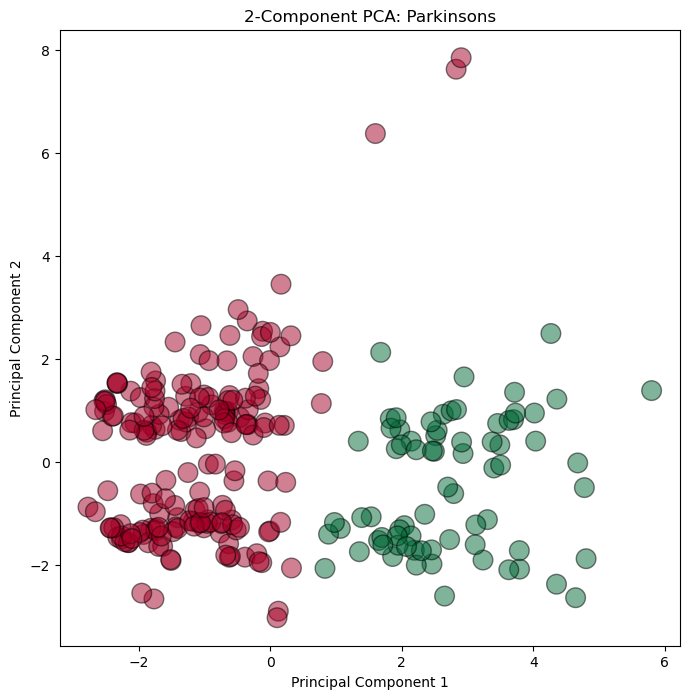

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

x = park_result2[:, 0]
y = park_result2[:, 1]

ax.scatter(x,y, cmap="RdYlGn", edgecolor='k', s=200, c=park_df_label, alpha=0.5)
plt.title('2-Component PCA: Parkinsons')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")

plt.savefig('pca2_park.jpg')


plt.show()

In [34]:
park_shape2 = park_pca2.components_.shape[0]
park_feature_names2 = park_df_columns

In [35]:
park_most_important2 = [np.abs(park_pca2.components_[i]).argmax() for i in range(park_shape2)]

park_most_important_names2 = [park_feature_names2[park_most_important2[i]] for i in range(park_shape2)]

park_dictionary2 = {'PC{}'.format(i): park_most_important_names2[i] for i in range(park_shape2)    
}

park_important_df2 = pd.DataFrame(park_dictionary2.items())
park_important_df2


,0,1
0,PC0,Oscillospira
1,PC1,Sex_female


## Explained Variance

In [57]:
park_pca1 = PCA()
park_result1 = park_pca1.fit_transform(park_df)
park_explained_variance = park_pca1.explained_variance_ratio_
park_explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(park_explained_variance))],
    'Explained Variance': park_explained_variance
})
park_explained_variance_df

,Principal Component,Explained Variance
0,PC1,0.158522
1,PC2,0.100290
2,PC3,0.093670
3,PC4,0.056186
4,PC5,0.052503
5,PC6,0.048310
6,PC7,0.047197
7,PC8,0.043367
8,PC9,0.040501
9,PC10,0.040225


In [58]:
park_cumulative_variance = np.cumsum(park_explained_variance)

park_cumulative_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(park_cumulative_variance))],
    'Cumulative Variance': park_cumulative_variance
})

pca_reduced_park = park_cumulative_variance_df.round(4)
#pca_reduced_park.to_csv('pca_parkinsons.csv')
pca95 = pca_reduced_park[0:21]
n_components95 = len(pca_reduced_park[0:21])
pca_reduced_park

,Principal Component,Cumulative Variance
0,PC1,0.1585
1,PC2,0.2588
2,PC3,0.3525
3,PC4,0.4087
4,PC5,0.4612
5,PC6,0.5095
6,PC7,0.5567
7,PC8,0.6000
8,PC9,0.6405
9,PC10,0.6808


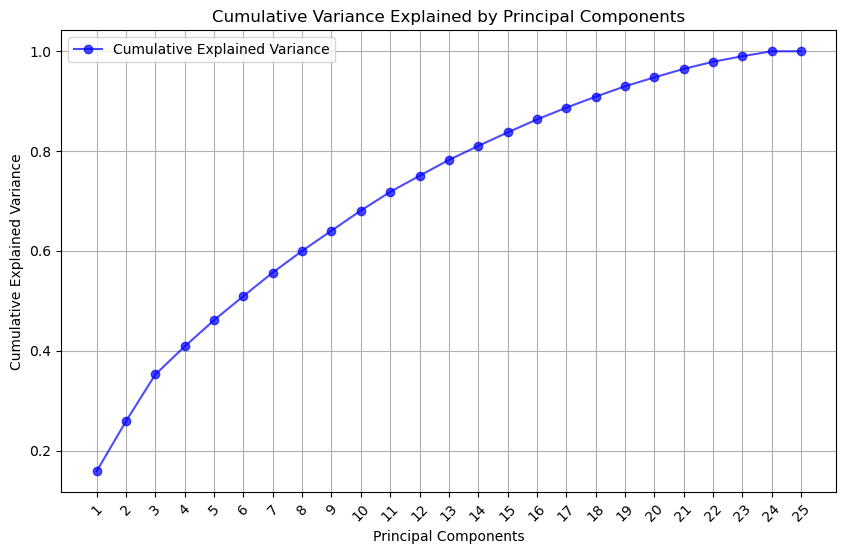

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(park_cumulative_variance) + 1), park_cumulative_variance, marker='o', 
         alpha=0.7, color='b', label='Cumulative Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(1, len(park_cumulative_variance) + 1))
plt.title('Cumulative Variance Explained by Principal Components')
#plt.xticks(range(1, len(park_cumulative_variance) + 1, 10))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.savefig('cumvar_park.jpg')
plt.show()

In [59]:
park_eigenvalues = park_pca1.explained_variance_
print("The top three eigenvalues are:", park_eigenvalues[0:3])

The top three eigenvalues are: [3.97859349 2.51709487 2.3509443 ]


In [60]:
pca_optimal = PCA(n_components=n_components95)
park_pca_transformed = pca_optimal.fit_transform(park_df)
park_pca_df = pd.DataFrame(park_pca_transformed, 
                           columns=[f"PC{i+1}" for i in range(n_components95)])

park_pca_df
#same number of rows as original dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-1.738859,-1.296514,-0.033122,-0.621913,0.623772,0.070671,0.064258,0.621873,0.090324,0.146614,...,-0.492599,0.375245,-0.218315,-0.421188,-0.578721,-0.407438,0.561840,-0.595941,-0.883907,0.663101
1,-0.587984,-1.131691,0.429753,-0.475606,0.699519,0.398237,0.413760,-0.230416,0.008481,-0.049148,...,-0.154392,0.134462,0.457434,-0.044220,-0.097081,-0.938825,-0.331839,0.646509,0.453517,-0.092334
2,-0.034686,-0.371639,3.980561,0.799270,0.493845,1.665265,-1.157084,0.120469,-0.232589,-0.108647,...,0.878684,0.611252,0.301015,1.053791,-0.424551,0.771568,-0.375925,0.942580,-0.110168,0.548617
3,-0.946042,-1.129653,0.195956,-0.519680,1.291384,1.356272,-0.620601,-0.506570,-0.019737,-0.088523,...,0.650309,0.308932,0.322983,0.504507,0.206418,-1.143744,-0.224453,0.328906,0.434892,-0.529075
4,-1.171460,-1.158872,0.882654,-0.597177,-0.010711,-0.650097,0.133131,0.144581,0.302390,0.164862,...,-0.091118,0.650664,-0.428146,-0.490958,-0.293814,-0.173596,-0.340961,-0.235112,-0.050079,0.414979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.135394,0.709763,-0.791356,-0.757568,-0.759489,0.533560,0.800680,0.076904,-0.022089,-0.024073,...,-0.581878,-0.768433,-0.448571,-0.460916,-0.432498,-0.149017,-1.019391,0.373739,0.635415,0.770552
252,-0.369586,0.723442,-0.953705,-0.911083,-0.698026,0.283759,0.749199,0.251662,-0.002383,0.054279,...,-0.615679,-0.605795,-0.451931,-0.762486,-0.573856,-0.001009,-0.767996,0.059142,0.061733,1.200445
253,-1.006075,-0.889841,0.119990,-4.689639,5.083386,-0.726700,7.286109,-7.855005,-3.428083,-2.477407,...,0.703441,0.184191,-2.817876,1.446407,1.667017,1.520374,1.787624,-0.837557,0.135568,-0.599102
254,-0.228057,1.276942,-1.503653,-2.033046,-3.983992,3.171786,4.417983,-1.928323,12.698478,0.259602,...,1.407649,1.331731,0.879062,1.737225,0.594675,-0.566787,1.870303,0.588207,-0.769892,-0.774912


In [48]:
total_variance_retained = np.sum(pca_optimal.explained_variance_ratio_)
print(f"Total variance retained: {total_variance_retained:.4f}")  # Should be >= 0.95

Total variance retained: 0.9647
